In [47]:
import pandas as pd
import numpy as np
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
css = """
<style>
table.dataframe th {
    background-color: #e04275 !important;
    color: white !important;
    text-align: left !important;
}
table.dataframe tr:nth-child(even) {
    background-color: #ffe6e6 !important;
}
table.dataframe tr:hover {
    background-color: #ffb3b3 !important;
}
table.dataframe td {
    padding: 8px !important;
    text-align: left !important;
}
</style>
"""

HTML(css)

# 📋 Column Description

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8" />
<style>
  body { 
    font-family: Arial, sans-serif; 
    margin: 20px; 
    background-color: #fff5f5; /* bardzo jasny róż */
    color: #993333; /* ciemny czerwony tekst */
  }
  h2 { 
    color: #aa4444; /* trochę jaśniejszy czerwony */
  }
  table { 
    border-collapse: collapse; 
    width: 100%; 
    max-width: 900px; 
  }
  th, td { 
    border: 1px solid #cc6666; /* wyrazisty czerwony obramowanie */
    padding: 10px; 
    text-align: left; 
  }
  th { 
    background-color: #cc6666; /* wyrazisty czerwony nagłówki */
    color: white; 
  }
  tr:nth-child(even) { 
    background-color: #ffe6e6; /* bardzo blady czerwony */
  }
  tr:hover { 
    background-color: #ffb3b3; /* jasny czerwony przy najechaniu */
  }
</style>
</head>
<body>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>PatientID</td><td>Unique identifier assigned to each patient; nominal value without predictive significance.</td></tr>
    <tr><td>Gender</td><td>Biological sex of the patient (e.g., Male, Female, Other).</td></tr>
    <tr><td>Age</td><td>Age of the patient at diagnosis, in years.</td></tr>
    <tr><td>Province</td><td>Region or province where the patient resides or received treatment.</td></tr>
    <tr><td>Ethnicity</td><td>Ethnic group of the patient (e.g., Han, Hui, Zhuang).</td></tr>
    <tr><td>TumorType</td><td>Type of diagnosed cancer (e.g., lung cancer, breast cancer).</td></tr>
    <tr><td>CancerStage</td><td>Clinical stage of cancer indicating disease progression (Stage I, II, III, IV).</td></tr>
    <tr><td>DiagnosisDate</td><td>Date when cancer diagnosis was made.</td></tr>
    <tr><td>TumorSize</td><td>Size of the tumor in centimeters or millimeters.</td></tr>
    <tr><td>Metastasis</td><td>Whether cancer has spread to other organs (Yes/No or binary).</td></tr>
    <tr><td>TreatmentType</td><td>Primary treatment method applied (surgery, chemotherapy, radiation, combination).</td></tr>
    <tr><td>SurgeryDate</td><td>Date of surgery, if performed.</td></tr>
    <tr><td>ChemotherapySessions</td><td>Number of chemotherapy sessions administered.</td></tr>
    <tr><td>RadiationSessions</td><td>Number of radiation therapy sessions administered.</td></tr>
    <tr><td>SurvivalStatus</td><td>Patient’s survival outcome at last follow-up (Alive/Deceased).</td></tr>
    <tr><td>FollowUpMonths</td><td>Number of months the patient was followed after diagnosis.</td></tr>
    <tr><td>SmokingStatus</td><td>Patient’s smoking history (Never, Former, Current).</td></tr>
    <tr><td>AlcoholUse</td><td>Patient’s alcohol consumption status (Yes, No, Occasionally).</td></tr>
    <tr><td>GeneticMutation</td><td>Presence of cancer-related genetic mutations (e.g., BRCA1/2).</td></tr>
    <tr><td>Comorbidities</td><td>Other existing medical conditions (e.g., diabetes, hypertension); possibly multi-label.</td></tr>
  </tbody>
</table>

</body>
</html>


# Import 📥

In [90]:
df = pd.read_csv(r"C:\Users\apietka\kaggle\China Cancer Patient Records\china_cancer_patients_synthetic.csv")

# 📊 Initial Data Exploration

In [4]:
df.head()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN


In [5]:
df.columns

Index(['PatientID', 'Gender', 'Age', 'Province', 'Ethnicity', 'TumorType',
       'CancerStage', 'DiagnosisDate', 'TumorSize', 'Metastasis',
       'TreatmentType', 'SurgeryDate', 'ChemotherapySessions',
       'RadiationSessions', 'SurvivalStatus', 'FollowUpMonths',
       'SmokingStatus', 'AlcoholUse', 'GeneticMutation', 'Comorbidities'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths      

<div style="border-radius:10px; border:1px solid #cc6666; padding: 10px; background-color: #ffe6e6; font-size:150%; text-align:left; margin-bottom:10px; color:#cc0000; font-weight:bold;">
  📊 Descriptive Statistics
</div>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,51.60020,19.705608,18.0,35.0,51.0,69.0,85.0
TumorSize,10000.0,6.33904,2.234999,0.5,4.8,6.4,7.9,14.2
ChemotherapySessions,10000.0,3.99900,6.203600,0.0,0.0,0.0,8.0,20.0
RadiationSessions,10000.0,3.04640,7.301505,0.0,0.0,0.0,0.0,30.0
FollowUpMonths,10000.0,30.43280,17.162545,1.0,16.0,31.0,45.0,60.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
PatientID,10000,10000,CHN-00001,1
Gender,10000,3,Female,3371
Province,10000,13,Guangdong,1841
Ethnicity,10000,6,Han,9110
TumorType,10000,6,Lung,2561
CancerStage,10000,4,II,2971
DiagnosisDate,10000,4383,2016-11-08,8
Metastasis,10000,2,No,7301
TreatmentType,10000,5,Chemotherapy,2072
SurgeryDate,4327,2915,2012-09-23,5


<div style="border-radius:10px; border:1px solid #cc6666; padding: 15px; background-color: #ffe6e6; font-size:150%; text-align:left; margin-bottom:20px;">
  <strong style="color:#cc0000;">🚫 Missing Values:</strong> This section shows the total number of missing values per column using <code>df.isna().sum()</code>.
</div>

In [9]:
isna = df.isna().sum()
percentna =isna/len(df) *100
x = pd.concat([isna,percentna],axis=1)
x.columns=['isNa','% Na']
x = x.drop(x[x['isNa'] == 0].index)
x

,isNa,% Na
SurgeryDate,5673,56.73
AlcoholUse,5921,59.21
GeneticMutation,7200,72.00
Comorbidities,3715,37.15


<div style="border-radius:10px; border:1px solid #cc6666; padding: 15px; background-color: #ffe6e6; font-size:100%; text-align:left; margin-bottom:20px;">
  <strong style="color:#cc0000;">🚫 Missing Data Summary:</strong><br><br>
  <ul style="padding-left: 20px;">
    <li><code>SurgeryDate</code> – 5673 missing values (56.73%)</li>
    <li><code>AlcoholUse</code> – 5921 missing values (59.21%)</li>
    <li><code>GeneticMutation</code> – 7200 missing values (72.00%)</li>
    <li><code>Comorbidities</code> – 3715 missing values (37.15%)</li>
  </ul>
</div>

# 🔍 Exploratory Data Analysis

<div style="border-radius:10px; border:1px solid #cc6666; padding: 10px; background-color: #ffe6e6; font-size:150%; text-align:left; margin-bottom:10px; color:#cc0000; font-weight:bold;">
  🔢 Numerical Feature Analysis
</div>

In [36]:
num_columns = df.select_dtypes(include=np.number).columns

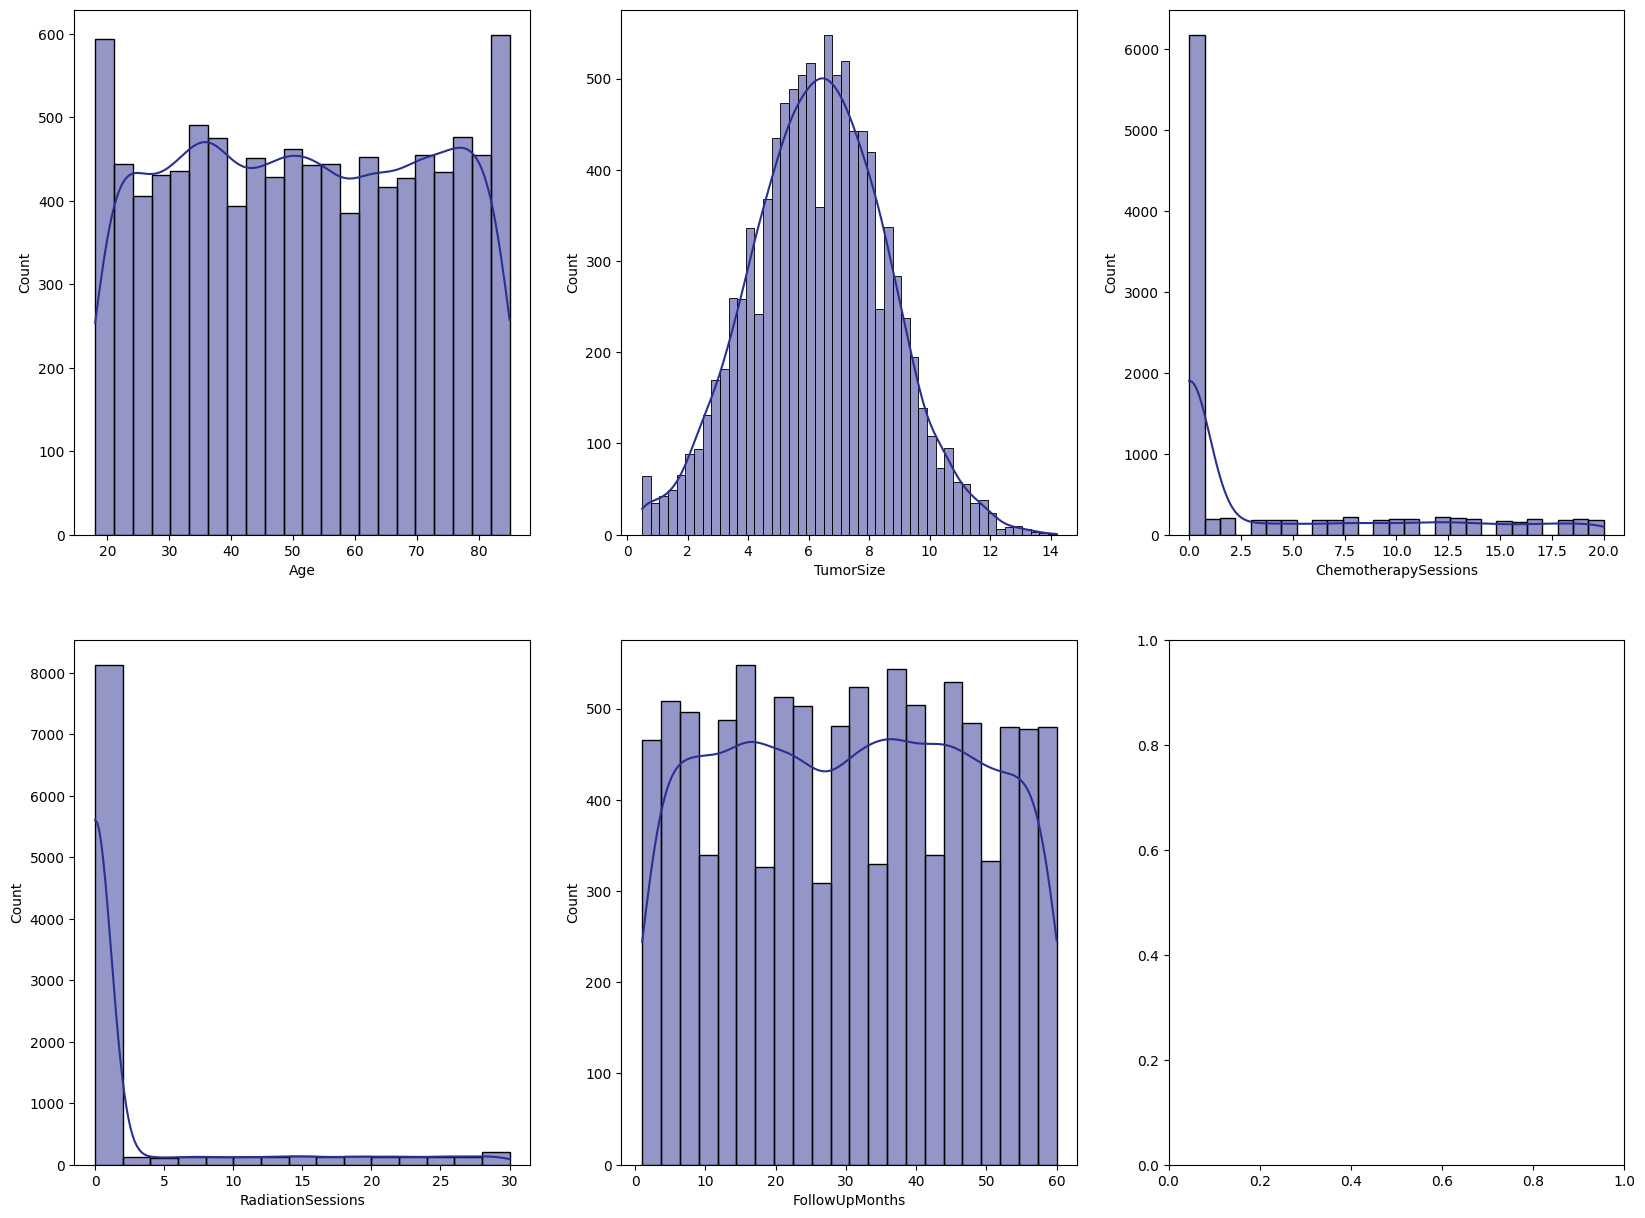

In [51]:
fig,ax = plt.subplots(2,3,figsize=(20,15))
for i,col in enumerate(num_columns):
    x,y= i%3,i//3
    sns.histplot(df,x=col,ax=ax[y,x],color='#2a2f91',kde= True)

<div style="border:1px solid #cc6666; border-radius:10px; background-color:#ffe6e6; padding:15px; font-size:105%; margin-bottom:20px;">

<b style="color:#cc0000; font-size:120%;">🔢 Numerical Feature Analysis</b><br><br>

<b>📌 Age</b><br>
📊 <i>Distribution:</i> Fairly uniform with some variation.<br>
🔍 <i>Insight:</i> The dataset spans a broad age range (20–80 years) with no dominant peak group.<br><br>

<b>📌 TumorSize</b><br>
📊 <i>Distribution:</i> Approximately normal, centered around 6.<br>
🔍 <i>Insight:</i> Most tumor sizes are near the mean, suggesting natural biological variation.<br><br>

<b>📌 ChemotherapySessions</b><br>
📊 <i>Distribution:</i> Heavily right-skewed; majority of patients had 0 sessions.<br>
🔍 <i>Insight:</i> Indicates many patients may not have undergone chemotherapy — possibly due to early diagnosis or alternative decisions.<br><br>

<b>📌 Unnamed Numeric Variable</b><br>
📊 <i>Distribution:</i> Extremely skewed with most values at 0.<br>
🔍 <i>Insight:</i> Likely a binary or event-count variable where 0 is the most common outcome.<br><br>

<b>📌 Another Numeric Variable</b><br>
📊 <i>Distribution:</i> Fairly uniform with some dips and spikes.<br>
🔍 <i>Insight:</i> Spread-out values suggest a possible time duration or usage count (e.g., hospital stay).

</div>


In [96]:
closer_look_num_col = ['ChemotherapySessions','RadiationSessions']
df['ChemotherapySessions'].unique()

array([ 0, 11,  4,  2, 10,  5, 19, 16, 18,  6, 13,  3, 15, 14, 12,  7,  1,
        9,  8, 17, 20], dtype=int64)

In [112]:
df['ChemotherapySessions'].value_counts()

ChemotherapySessions
0     6182
12     218
8      213
13     209
2      204
19     200
11     200
17     196
10     195
1      190
14     189
20     188
3      186
4      186
5      184
7      182
9      182
18     181
6      179
15     175
16     161
Name: count, dtype: int64

<Axes: xlabel='ChemotherapySessions', ylabel='count'>

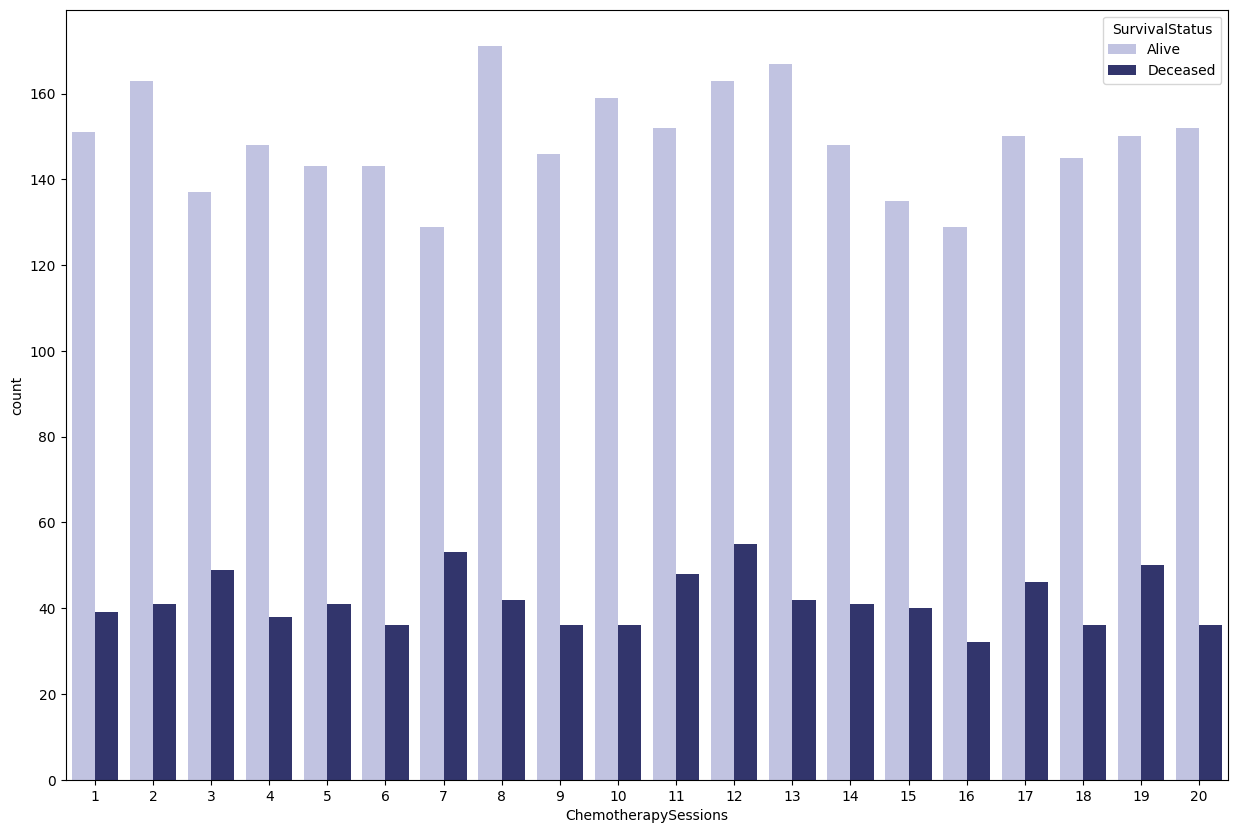

In [128]:
plt.figure(figsize=(15, 10))  # szerokość, wysokość w calach
sns.countplot(df[df['ChemotherapySessions']>0],x='ChemotherapySessions',hue='SurvivalStatus',palette=['#bcbee6','#282c76'])

<div style="border-radius:10px; border:1px solid #cc6666; padding: 10px; background-color: #ffe6e6; font-size:120%; text-align:left; margin-bottom:10px; color:#cc0000; font-weight:bold;">
  <b>Conclusions from the chart:</b><br><br>
  • For each number of chemotherapy sessions, the number of "Alive" patients is clearly higher than the number of "Deceased" patients.<br>
  • The number of deaths does not show a clear increasing or decreasing trend as the number of sessions increases.<br>
  • The number of surviving patients remains relatively stable across all session categories.<br>
  • There is no evident impact of the number of chemotherapy sessions on patient survival.<br><br>
  <b>Summary:</b> Most patients survive regardless of the number of chemotherapy sessions, and the session count does not clearly correlate with mortality or survival.
</div>


<Axes: xlabel='RadiationSessions', ylabel='count'>

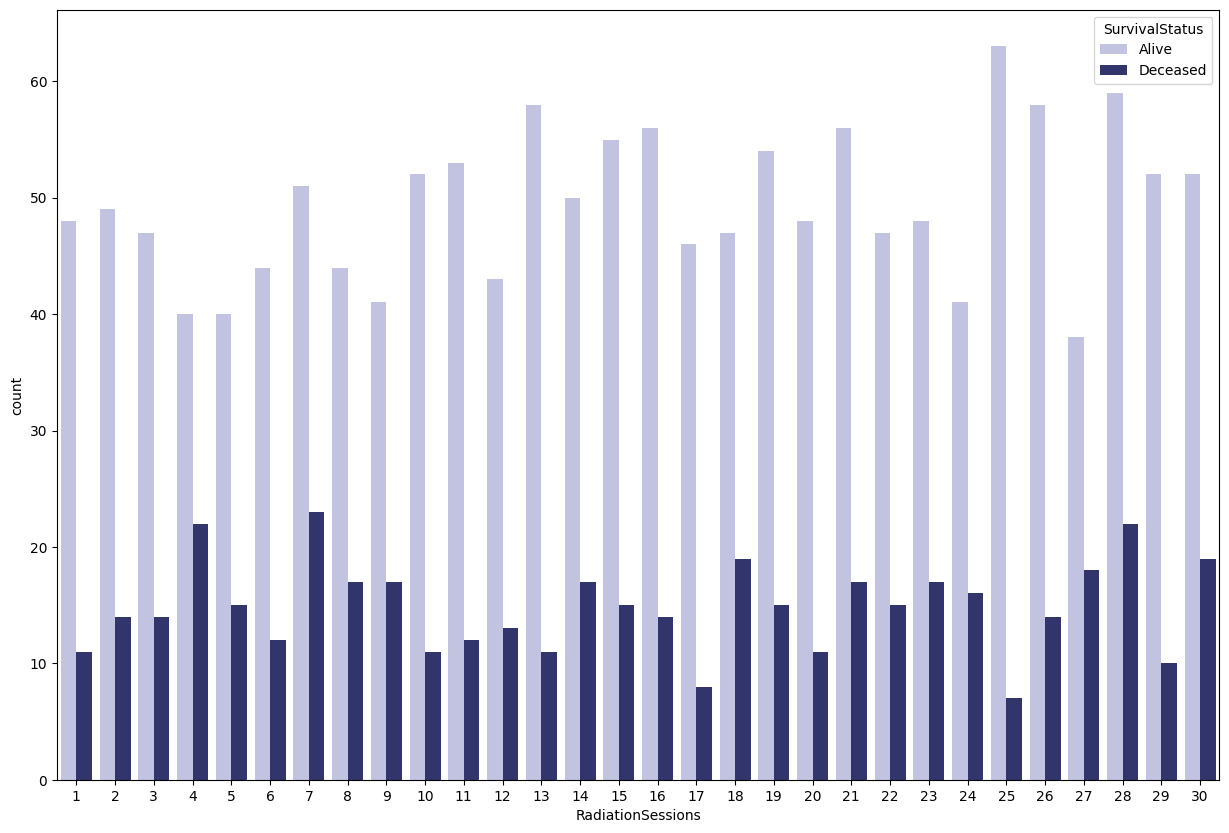

In [133]:
plt.figure(figsize=(15, 10))  # szerokość, wysokość w calach
sns.countplot(df[df['RadiationSessions']>0],x='RadiationSessions',hue='SurvivalStatus',palette=['#bcbee6','#282c76'])

<div style="border-radius:10px; border:1px solid #cc6666; padding: 10px; background-color: #ffe6e6; font-size:120%; text-align:left; margin-bottom:10px; color:#cc0000; font-weight:bold;">
  <b>Conclusions from the chart:</b><br><br>
  • For each number of radiation sessions, the number of "Alive" patients is consistently higher than the number of "Deceased" patients.<br>
  • The number of deaths does not show a clear increasing or decreasing trend as the number of sessions increases.<br>
  • The number of surviving patients remains relatively stable across all session categories.<br>
  • There is no evident impact of the number of radiation sessions on patient survival.<br><br>
  <b>Summary:</b> Most patients survive regardless of the number of radiation sessions, and the session count does not clearly correlate with mortality or survival.
</div>

<div style="border-radius:10px; border:1px solid #cc6666; padding: 10px; background-color: #ffe6e6; font-size:150%; text-align:left; margin-bottom:10px; color:#cc0000; font-weight:bold;">
  🏷️ Categorical Feature Analysis
</div>

In [140]:
cat_columns =  df.select_dtypes(exclude=np.number).columns
cat_columns.size

15

In [ ]:
fig,ax = plt.subplots(3,5,figsize=(15,10))
for i,col in enumerate(cat_columns):
   x,y= i%5,i//5
   sns.boxplot(df,x=col,ax=ax[y,x],color='#2a2f91')